In [226]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy import stats
from scipy.spatial.distance import cdist

%matplotlib inline


In [227]:
all_df = pd.read_csv('all_types.csv')
all_df

,Unnamed: 0,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,...,lot_finish,age,p_sqft,finishedsqft_rooms,index,adjusted_price,adj_p_sqft,adj_price_m,group,zpid
0,0,630000,57 Sunnyside St,Boston,MA,2136,630000.0,1456383600000,2016-02-25,9,...,2.036306,126,132.214061,297.812500,185.020374,7.280159e+05,152.784036,0.728016,low_price_high_freq,59128191
1,1,599000,29 Tremlett St,Boston,MA,2124,599000.0,1454310000000,2016-02-01,6,...,0.696667,106,153.589744,260.000000,185.020374,6.921929e+05,177.485366,0.692193,low_price_high_freq,59107688
2,2,550000,59 Armandine St,Dorchester Center,MA,2124,550000.0,1456729200000,2016-02-29,10,...,0.967778,96,152.777778,211.764706,185.020374,6.355695e+05,176.547073,0.635569,low_price_high_freq,2128902346
3,3,1321000,27 Shannon St,Boston,MA,2135,1321000.0,1456210800000,2016-02-23,6,...,1.351724,86,455.517241,263.636364,185.020374,1.526522e+06,526.386999,1.526522,low_price_high_freq,2122347365
4,4,1788000,103 Myrtle St,Boston,MA,2114,1788000.0,1455865200000,2016-02-19,3,...,0.281250,126,745.000000,240.000000,185.020374,2.066179e+06,860.907729,2.066179,low_freq,59173626
5,5,545000,16 Jewett St,Boston,MA,2131,545000.0,1455868800000,2016-02-19,5,...,3.061856,101,255.388941,213.400000,185.020374,6.297916e+05,295.122568,0.629792,low_price_high_freq,59141374
6,6,2615,1 Longfellow Pl,Boston,MA,2114,2615.0,1455240600000,2016-02-12,0,...,318.413066,40,2.755532,316.333333,185.020374,3.021844e+03,3.184240,0.003022,low_freq,2098812523
7,7,1350000,26 S Huntington Ave,Jamaica Plain,MA,2130,1350000.0,1454310000000,2016-02-01,3,...,99.999000,96,1350.000000,66.666667,185.020374,1.560034e+06,1560.034140,1.560034,low_price_high_freq,59168349
8,8,345000,1714 Commonwealth Ave APT 2,Boston,MA,2135,345000.0,1456470000000,2016-02-26,2,...,130.376793,96,449.804433,191.750000,185.020374,3.986754e+05,519.785386,0.398675,low_price_high_freq,59093377
9,9,$3.32M,2 Commonwealth Ave APT 15D,Boston,MA,2116,3320000.0,1456387200000,2016-02-25,1,...,16.536889,34,2951.111111,375.000000,185.020374,3.836528e+06,3410.247471,3.836528,high_price_high_freq,59176250


In [228]:
df = all_df[['bedrooms','bathrooms','finished_SqFt', 'total_rooms', 'neighborhood']]

In [229]:
# Create dummies for categorical data
neighborhood = pd.get_dummies(df['neighborhood'])
df = pd.concat([df,neighborhood],axis=1)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 32 columns):
bedrooms             1808 non-null int64
bathrooms            1808 non-null float64
finished_SqFt        1808 non-null float64
total_rooms          1808 non-null float64
neighborhood         1808 non-null object
Allston              1808 non-null uint8
Back Bay             1808 non-null uint8
Bay Village          1808 non-null uint8
Beacon Hill          1808 non-null uint8
Brighton             1808 non-null uint8
Charlestown          1808 non-null uint8
Chinatown            1808 non-null uint8
Downtown             1808 non-null uint8
Downtown Crossing    1808 non-null uint8
East Boston          1808 non-null uint8
Fenway               1808 non-null uint8
Hyde Park            1808 non-null uint8
Jamaica Plain        1808 non-null uint8
Kenmore              1808 non-null uint8
Leather District     1808 non-null uint8
Mattapan             1808 non-null uint8
Mission Hill         1808

In [233]:
X = df.drop(['neighborhood'], axis=1)

# X.to_csv('cluster_df.csv')

# Standardize
scale = StandardScaler()
scale.fit(X)
scaled_df = scale.transform(X)
print(scaled_df)

[[ 1.69901884  0.98526852  0.3201333  ... -0.04708816 -0.25328913
  -0.02352453]
 [ 0.64159162  0.29226502  0.17643318 ... -0.04708816 -0.25328913
  -0.02352453]
 [ 2.05149458  3.06427901  0.12659498 ... -0.04708816 -0.25328913
  -0.02352453]
 ...
 [ 0.99406736  0.29226502  0.03937815 ... -0.04708816 -0.25328913
  -0.02352453]
 [-0.76831133 -1.09374197 16.1411018  ... -0.04708816 -0.25328913
  -0.02352453]
 [-0.76831133 -0.40073847  0.37013763 ... -0.04708816 -0.25328913
  -0.02352453]]


In [234]:
distortions = []
K = [2, 4, 6, 10, 20, 30, 50, 100]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_df)
    kmeanModel.fit(scaled_df)
    distortions.append(sum(np.min(cdist(scaled_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

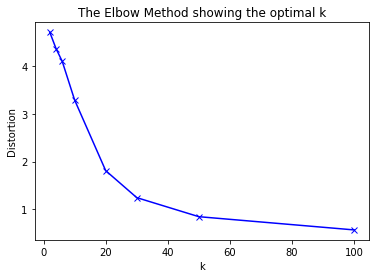

In [235]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [236]:
# Find the best k for clustering

scores = []
for k in [2, 4, 6, 10, 20, 30, 50, 100]:
    kmeans2 = KMeans(n_clusters = k)
    kmeans2.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, kmeans2.labels_))

scores

[0.09440000306472494,
 0.14113354289529767,
 0.15473793399593155,
 0.324298623801886,
 0.5946165024203786,
 0.6769285181427902,
 0.5296891609024005,
 0.41703273453481504]

In [237]:
#Cluster the data
kmeans = KMeans(n_clusters=50)
kmeans = kmeans.fit(scaled_df)

labels = kmeans.predict(scaled_df)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [238]:
C

array([[-2.24911233e-01, -3.35769393e-01, -1.37312095e-01, ...,
        -4.70881609e-02, -2.53289134e-01, -2.35245283e-02],
       [-1.32786893e-01,  7.38517276e-01, -4.21931187e-04, ...,
        -4.70881609e-02, -2.53289134e-01, -2.35245283e-02],
       [-8.21515215e-01, -8.71457825e-01, -2.44915838e-01, ...,
        -4.70881609e-02, -2.53289134e-01, -2.35245283e-02],
       ...,
       [-1.16231214e-01,  8.43639764e-02, -2.61839984e-02, ...,
        -4.70881609e-02, -2.53289134e-01, -2.35245283e-02],
       [-2.26040963e-01,  1.11853842e+00, -1.85363914e-02, ...,
        -4.70881609e-02, -2.53289134e-01, -2.35245283e-02],
       [-1.12078707e+00, -1.06051577e+00, -3.56218776e-01, ...,
        -4.70881609e-02, -2.53289134e-01, -2.35245283e-02]])

In [239]:
kmeans.score(scaled_df)

-1896.9585276026185

In [198]:
#Glue back to originaal data
all_df['cluster'] = labels

In [199]:
all_df.head()

,Unnamed: 0,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,...,age,p_sqft,finishedsqft_rooms,index,adjusted_price,adj_p_sqft,adj_price_m,group,zpid,cluster
0,0,630000,57 Sunnyside St,Boston,MA,2136,630000.0,1456383600000,2016-02-25,9,...,126,132.214061,297.812500,185.020374,7.280159e+05,152.784036,0.728016,low_price_high_freq,59128191,3
1,1,599000,29 Tremlett St,Boston,MA,2124,599000.0,1454310000000,2016-02-01,6,...,106,153.589744,260.000000,185.020374,6.921929e+05,177.485366,0.692193,low_price_high_freq,59107688,5
2,2,550000,59 Armandine St,Dorchester Center,MA,2124,550000.0,1456729200000,2016-02-29,10,...,96,152.777778,211.764706,185.020374,6.355695e+05,176.547073,0.635569,low_price_high_freq,2128902346,5
3,3,1321000,27 Shannon St,Boston,MA,2135,1321000.0,1456210800000,2016-02-23,6,...,86,455.517241,263.636364,185.020374,1.526522e+06,526.386999,1.526522,low_price_high_freq,2122347365,5
4,4,1788000,103 Myrtle St,Boston,MA,2114,1788000.0,1455865200000,2016-02-19,3,...,126,745.000000,240.000000,185.020374,2.066179e+06,860.907729,2.066179,low_freq,59173626,0


In [247]:
user_input = {'bedrooms':5, 'bathrooms': 3,'finished_SqFt': 4500,'total_rooms': 12,
'Allston': 0, 
'Back Bay': 0,              
'Bay Village': 0,          
'Beacon Hill': 0,           
'Brighton': 0,  
'Charlestown': 0, 
'Chinatown': 0, 
'Downtown': 0, 
'Downtown Crossing': 0, 
'East Boston': 0, 
'Fenway': 0, 
'Hyde Park': 0, 
'Jamaica Plain': 0, 
'Kenmore': 0, 
'Leather District': 0, 
'Mattapan': 0, 
'Mission Hill': 0, 
'North Dorchester': 0, 
'North End': 0, 
'Roslindale': 0, 
'Roxbury': 0, 
'South Boston' : 0,
'South Dorchester': 0, 
'South End': 1, 
'West End': 0, 
'West Roxbury': 0, 
'Winthrop': 0}

user_df = pd.DataFrame(user_input, index=[0])
print(user_df)

   bedrooms  bathrooms  finished_SqFt  total_rooms  Allston  Back Bay  \
0         5          3           4500           12        0         0   

   Bay Village  Beacon Hill  Brighton  Charlestown    ...     \
0            0            0         0            0    ...      

   North Dorchester  North End  Roslindale  Roxbury  South Boston  \
0                 0          0           0        0             0   

   South Dorchester  South End  West End  West Roxbury  Winthrop  
0                 0          1         0             0         0  

[1 rows x 31 columns]


In [248]:
# scale = StandardScaler()
scaled_user_df = scale.transform(user_df)
print(scaled_user_df)

[[ 0.28911588  0.29226502  0.27610957  0.58514842 -0.0974264  -0.36543443
  -0.09146511 -0.1754616  -0.20803258 -0.18686091 -0.11841162 -0.0974264
  -0.04708816 -0.24451785 -0.08510194 -0.21090983 -0.30513541 -0.07823882
  -0.02352453 -0.19000829 -0.09146511 -0.18686091 -0.16157567 -0.21516574
  -0.27602622 -0.28178535 -0.32736024  3.27723355 -0.04708816 -0.25328913
  -0.02352453]]


In [249]:
# Get cluster for user input
user_cluster = kmeans.predict(scaled_user_df)

In [250]:
print(user_cluster)

[1]


In [251]:
# Get distance from user input datapoint
trans = kmeans.transform(scaled_df)

In [252]:
trans

array([[ 2.90280235,  6.53937523,  8.02965087, ...,  6.96354064,
        10.22396781,  7.2792206 ],
       [ 6.27419678,  5.1468044 ,  6.64337975, ...,  5.61185823,
         9.40526495,  5.62033156],
       [ 7.49895753,  6.07691663,  8.12617216, ...,  6.72307863,
         9.8638005 ,  7.4586605 ],
       ...,
       [ 6.84429042,  5.83563956,  7.19787391, ...,  1.27424295,
         9.79611726,  6.26995194],
       [17.77620275, 17.41366007, 16.3886067 , ..., 17.57837243,
        19.11133756, 17.52377716],
       [ 6.06325627,  5.113861  ,  6.17852489, ...,  5.57491102,
         9.36946865,  4.88968958]])

In [253]:
closest_point1, closest_point2, closest_point3 = 0,0,0
argsor = np.argsort(trans[:, user_cluster[0]])
for i, argsortidx in enumerate(argsor):
    if argsortidx == 0:
        closest_point1 = i
    elif argsortidx == 1:
        closest_point2 = i
    elif argsortidx == 2:
        closest_point3 = i


closest_points = []
for i, argsortidx in enumerate(argsor):
    if i == 3:
        break
    closest_points.append(argsortidx)

print(closest_points)

[1667, 610, 450]


In [143]:
for i in closest_points:
    print(all_df.iloc[i])
    print(all_df.loc[i,'zpid'])

Unnamed: 0                             31
title                              600000
address                     19 Woolson St
city                               Boston
state                                  MA
zipcode                              2126
price                              600000
date_sold                   1454655600000
readable_date_sold             2016-02-05
bedrooms                                3
bathrooms                               1
living_area                        143027
lot_size                             5227
year_built                           1910
home_type                       APARTMENT
home_status                          SOLD
finished_SqFt                      143027
total_rooms                            16
neighborhood                     Mattapan
DATE                           2016-02-01
bed_bath                                3
lot_finish                      0.0365455
age                                   106
p_sqft                            